# House sale predictions using Polynomial Regression

In [1]:
# Import all requiered libraries
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Import dataset
data = pd.read_csv('kc_house_data.csv')
# create a Evaluation Dataframe
Eval_table = pd.DataFrame({'Model': [],
                          'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'R-squared (test)':[]})

## Simple Linear Regression

In [3]:
# Define features and labels 
x = data.iloc[:,5].values.reshape(-1,1)
y = data.iloc[: , 2].values
# Splitting data into train and test
x_train , x_test ,y_train ,y_test = train_test_split(x,y , test_size = 0.30 , random_state = 0 )
# Applying Linear Regression Model 
lr_regressor = LinearRegression()
#Fitting data to the model
lr_regressor.fit(x_train , y_train)
# Predicting the test result
lr_pred = lr_regressor.predict(x_test)
#Calculating R-Squared and RMSE value for both training and test data
score = lr_regressor.score(x_train , y_train)
score1 = lr_regressor.score(x_test, y_test)
rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test,lr_pred)),'.3f'))
# Appending the values to the Evaluation table
loc = Eval_table.shape[0]
Eval_table.loc[loc] = ['Simple Linear Regression' , rmse , score , score1  ]


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Floors')]

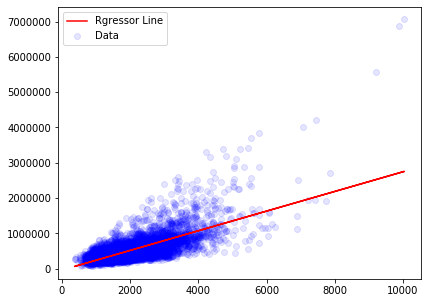

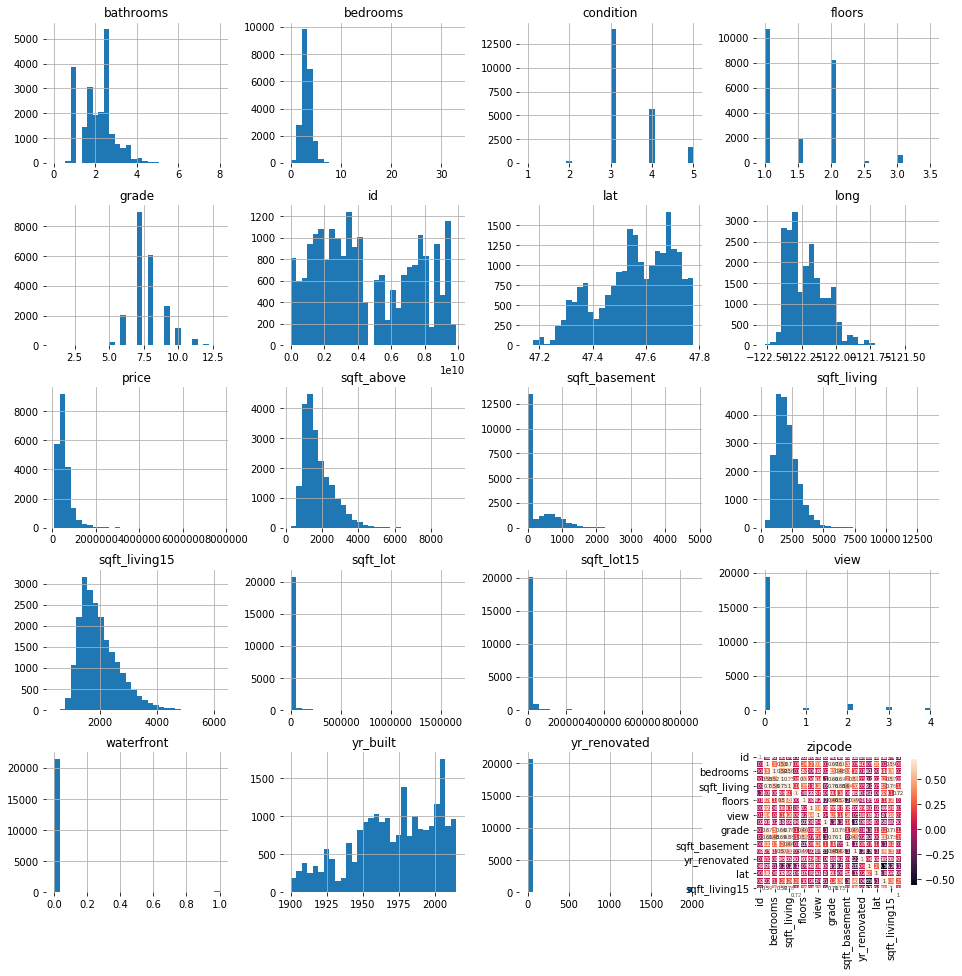

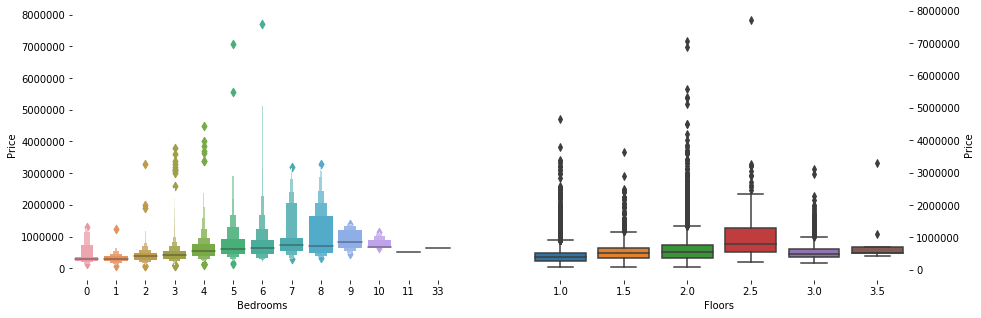

In [4]:
# Data visulazations
plt.figure(figsize = (6.5,5))
plt.scatter(x_test , y_test , label = 'Data' ,alpha=0.1 , color ='b')
plt.plot(x_test , lr_pred , label = 'Rgressor Line' , color = 'red')
plt.legend()
#Histogram of data
data.hist(figsize= (16,16), bins= 30)
sns.despine(left=True, bottom=True)
#check correlations using heatmap
sns.heatmap(data.corr(),linewidths=0.50,vmax=0.7,square=True,linecolor='w',annot=True,annot_kws={"size":5},cbar_kws={"shrink": .9})
#For outliers detection
fig , axes = plt.subplots(1, 2 , figsize = (15,5))
sns.boxenplot(x = data['bedrooms'] , y = data['price'] , ax = axes[0])
sns.boxplot(x = data['floors'] , y = data['price'] , ax = axes[1])
sns.despine(left= True , bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

## Multiple Linear Regression (Considering all features)

In [5]:
# Defining dependent and independent variables
x = data.drop(['price','date', 'id'], axis = 1).values
y = data['price'].values
# Splitting data into train and test
train_x , test_x , train_y , test_y =train_test_split(x,y,test_size = 0.30 , random_state = 101)
# Applying Linear regression model (Considering all features)
lr = LinearRegression()
# fitting our train data into the model
lr.fit(train_x,train_y)
# Preicting the test result
pred_r  = lr.predict(test_x)
# Calculating R-squared and RMSE value
score_tr = lr.score(train_x,train_y)
score_te =lr.score(test_x , test_y)
rmse_ml = float(format(np.sqrt(metrics.mean_squared_error(test_y , pred_r )),'.3f'))
# Updating values to the Evaluation Table
loc1 = Eval_table.shape[0]
Eval_table.loc[loc1] = ['Multiple linear regression' , rmse_ml , score_tr  , score_te ]


## Polynomial Regression (Degree=3)

In [6]:
# Defining dependent and independent variables
x = data.drop(['price' , 'id' , 'date'], axis = 1).values
y = data['price'].values
# Splitting data into train and test
x_train , x_test , y_train , y_test = train_test_split( x  , y , test_size = 0.30 , random_state = 101)
# Since the distribution of data is commplex we have to apply polynomial regression of degree 3
plm = PolynomialFeatures(degree= 3)
# Fitting and transforming the features to the degree of 3  
new_x = plm.fit_transform(x) 
train = plm.fit_transform(x_train)
test = plm.fit_transform(x_test)
# Applying Linear regression model 
lr_poly = LinearRegression()
# Fitting data into the model
lr_poly.fit(train , y_train)
# predicting test result
predictions = lr_poly.predict(test)
# Calculating R-squared and RMSE value
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test ,predictions ))
train_score = lr_poly.score(train , y_train)
test_score = lr_poly.score(test , y_test)
# Updating values to the Evaluation Table
r = Eval_table.shape[0]
Eval_table.loc[r]=['Polynomial regression (Degree=3)' , rmse_poly , train_score , test_score]

## Polynomial Regression (Degree=2)

In [7]:
# Defining dependent and independent variables
x = data.drop(['price' , 'id' , 'date'], axis = 1).values
y = data['price'].values
# Splitting data into train and test
x_train , x_test , y_train , y_test = train_test_split( x  , y , test_size = 0.30 , random_state = 101)
# Since the distribution of data is commplex we have to apply polynomial regression of degree 3
plm = PolynomialFeatures(degree= 2)
# Fitting and transforming the features to the degree of 3  
new_x = plm.fit_transform(x) 
train = plm.fit_transform(x_train)
test = plm.fit_transform(x_test)
# Applying Linear regression model 
lr_poly = LinearRegression()
# Fitting data into the model
lr_poly.fit(train , y_train)
# predicting test result
predictions = lr_poly.predict(test)
# Calculating R-squared and RMSE value
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test ,predictions ))
train_score = lr_poly.score(train , y_train)
test_score = lr_poly.score(test , y_test)
# Updating values to the Evaluation Table
r = Eval_table.shape[0]
Eval_table.loc[r]=['Polynomial regression (Degree=2)' , rmse_poly , train_score , test_score]

## K-NN Regression

In [8]:
#Creating object of the regresser
knn_reg  = KNeighborsRegressor(n_neighbors= 15 , metric= 'minkowski' , p= 5)
# Fitting data to the model
knn_reg.fit(x_train , y_train)
# Predicting test result
pred_knn = knn_reg.predict(x_test)
# Calculating R-squared and RMSE value
train_knn = knn_reg.score(x_train , y_train)
test_knn = knn_reg.score(x_test,y_test)
rmse_knn =np.sqrt(metrics.mean_squared_error(y_test , pred_knn))
# Updating results to the Evaluaton table
t = Eval_table.shape[0]
Eval_table.loc[t] = ['K-NN Regressor' , rmse_knn , train_knn ,test_knn]

In [9]:
Eval_table

,Model,Root Mean Squared Error (RMSE),R-squared (training),R-squared (test)
0,Simple Linear Regression,264896.232000,0.494534,0.488899
1,Multiple linear regression,202591.311000,0.695986,0.707409
2,Polynomial regression (Degree=3),421338.116146,0.868537,-0.265556
3,Polynomial regression (Degree=2),155324.054609,0.824895,0.828012
4,K-NN Regressor,268819.352615,0.548606,0.484841
